# Introduction to scikit-learn

Humans-And-Data Workshop

22 June 2021 - Raphaela Kotsch

The following notebook gives a short introduction to Scikit-learn. 

### Overview: 

1. What is the package needed for? 
2. What are its advantages/disadvantages? 
3. Example script in which 2-3 functions of the package are applied.


### Short history: 

Developed in 2007 as part of Google's summer of code project by David Cournapeau. 


### Prerequisits: 

- Python
- NumPy
- SciPy
- Matplotlib: for plotting
- Pandas: for data structure and analysis.
- Joblib 





# 1. What is the library needed/used for?

Scikit-learn is a useful (some say the best) library for machine learning. It offers a wide range of tools for ML applications and statistical modelling. Some fields of application are:

1. Supervised learning algorithms

2. Unsupervised learning algorithms

3. Feature extraction

4. Cross-validation

5. Dimensionality reduction

6. Clustering

7. Ensemble methods





![title](img/scikit.png)








# Pro and cons of scikit 

### Pros


- distributed under BSD license, which makes it free
- easy to use and offers many applications
- open source with large community and many people contributing to improve and extend the library
- can be integrated via API 


### Cons

- can't do Automatic Machine Learning (AutoML) and more complex pipelines 
- problem with deep learning frameworks (TensorFlow, Keras, PyTorch, Poutyne)
- lacks to provide lifecycle methods to manage resources and GPU memory allocation

# Applications to carbon market trading data


Carbon markets are a key policy tool used worldwide. One of the frst and largest carbon markets to date is the European Union Emissions trading System (EU ETS), which was mplemented in 2005.

Total amount of greenhouse gas emissions is caped for certain industries. Firms belonging to these industries need to surrender one emission allowance for each ton of CO2 emitted in each year. However, not only firms thatneed to comply with the climate regulation are allowed in the markets, in the beginning there were no restrictions for market access. 
 


### Application of scikit: fraud detection

From 2008 to 2010, the market experienced major fraud scandals that invloved organized crime groups thatperformed VAT carousels and money laundering. Based on news paper articles and conviction documents, it was possible to manually identify and flag fraudulent accounts in the EU ETS registry. 



![title](img/fraud.png)




# Import packages

In [151]:
# Import packages
import sys
import pandas as pd
import matplotlib as mpl
import numpy as np
import scipy as sp
import IPython
import sklearn
import itertools
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

# standard library imports
import os
import sys
from collections import Counter

# sklearn outlier models
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LocalOutlierFactor # Use pyod's wrapper
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# other sklearn functions
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet, EmpiricalCovariance
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale as preproc_scale
from sklearn.manifold import TSNE

# pyod
import pyod
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.pca import PCA as pyod_PCA
from pyod.models.iforest import IForest
from pyod.models.mo_gaal import MO_GAAL
from pyod.models.so_gaal import SO_GAAL


# preprocessing
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
import sklearn.model_selection as model_selection


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
import collections

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score



%matplotlib inline


In [129]:

def byte_decoder(val):
    # decodes byte literals to strings
    
    return val.decode('utf-8')

# Import data 

In [125]:
# import account data with flaged fraud accounts
file_acc = "/Users/kotsch/Documents/07_Projects/2020_03_Fraud_detection/Data/accounts_aggregated_fraud_labeled.csv"
df_acc = pd.read_csv(file_acc)
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40294 entries, 0 to 40293
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   accountName                       40294 non-null  object 
 1   accountHolderName                 40294 non-null  object 
 2   registryCode                      40294 non-null  object 
 3   nationalAdminstrator              40294 non-null  object 
 4   accountType                       40294 non-null  object 
 5   accountTypeCode                   40294 non-null  object 
 6   accountOpen                       40294 non-null  bool   
 7   accountOpeningDate                40284 non-null  object 
 8   accountClosingDate                40294 non-null  object 
 9   DaysAccountOpen                   39368 non-null  float64
 10  commitmentPeriod                  19079 non-null  object 
 11  companyRegistrationNumber         36030 non-null  object 
 12  inst

/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean numerical variables

In [126]:
#shape of the original vs. cleaned sample
print('table size before cleaning, ', df_acc.shape)


# replace NA values
df_acc.fillna(0, inplace = True)


# Replace the strings (WAHR/FALSCH) with floats (1/0)
# Fraud = WAHR = 1 / no fraud = FALSCH = 0
df_acc['fraud'] = df_acc['Fraudulent'].replace({False: 0, True: 1}, inplace=False)


df_acc.info()


table size before cleaning,  (40294, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40294 entries, 0 to 40293
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   accountName                       40294 non-null  object 
 1   accountHolderName                 40294 non-null  object 
 2   registryCode                      40294 non-null  object 
 3   nationalAdminstrator              40294 non-null  object 
 4   accountType                       40294 non-null  object 
 5   accountTypeCode                   40294 non-null  object 
 6   accountOpen                       40294 non-null  bool   
 7   accountOpeningDate                40294 non-null  object 
 8   accountClosingDate                40294 non-null  object 
 9   DaysAccountOpen                   40294 non-null  float64
 10  commitmentPeriod                  40294 non-null  object 
 11  companyRegistrationNumber 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c16b40fd0>,
      dtype=object)

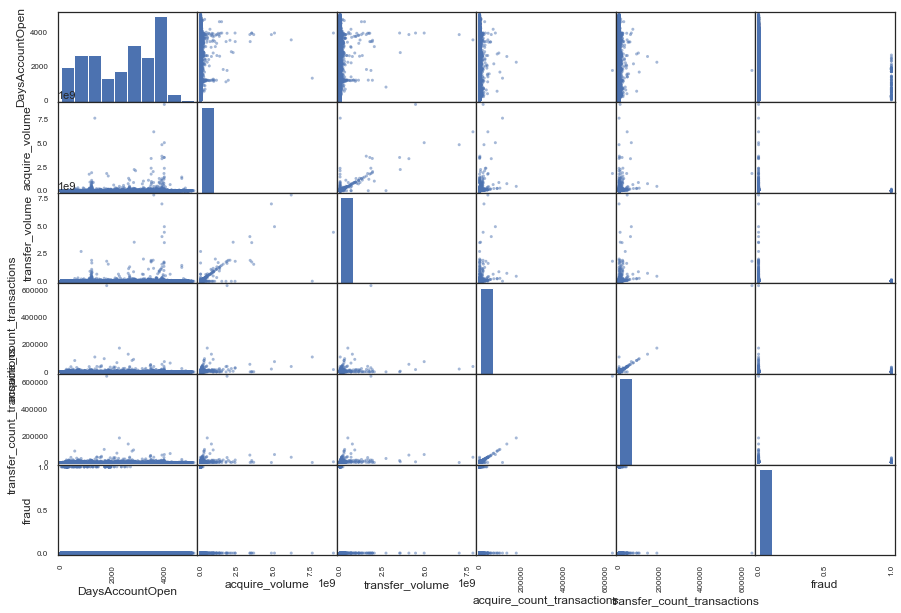

In [127]:
from pandas.plotting import scatter_matrix

attributes = ["DaysAccountOpen", "acquire_volume", "transfer_volume", 
              "acquire_count_transactions", "transfer_count_transactions", "fraud"]

scatter_matrix(df_acc[attributes], figsize=(15, 10))

/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c135b8f90>,
      dtype=object)

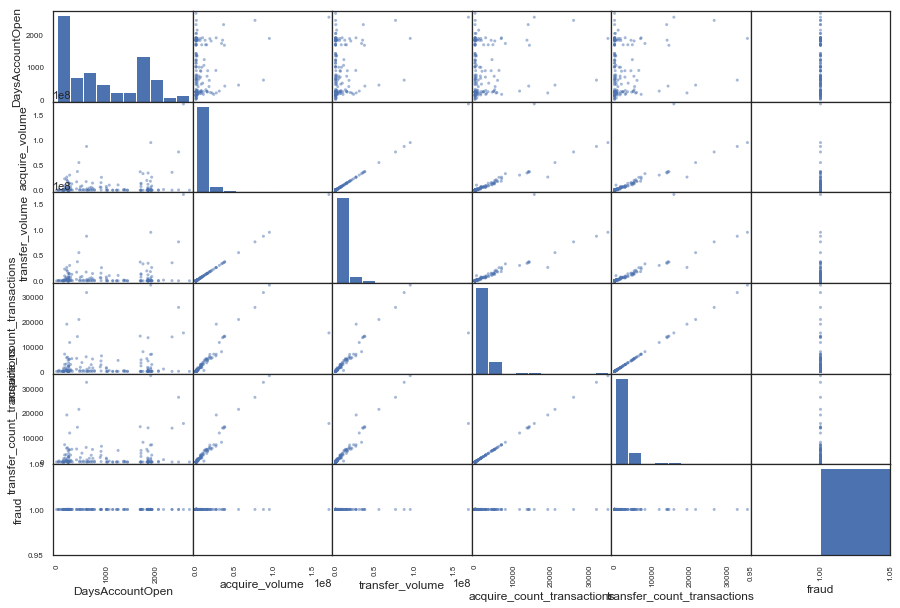

In [128]:
df_fraud = df_acc[df_acc['Fraudulent'] == True]

scatter_matrix(df_fraud[attributes], figsize=(15, 10))

# Data cleaning & preprocessing

Transaction data from 2005 to 2015. Aggregation of trading metrics for each account in the registry. 

## Encode categorical attributes

In [6]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_acc["accountType_encode"] = ordinal_encoder.fit_transform(df_acc[["accountType"]])

In [7]:
accounttype = df_acc[["accountType"]]
accounttype_encode = ordinal_encoder.fit_transform(accounttype)
accounttype_encode

array([[30.],
       [21.],
       [25.],
       ...,
       [20.],
       [ 1.],
       [27.]])

### One-hot encoding

In [122]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

df_acc["accountType_encode"] = cat_encoder.fit_transform(df_acc[["accountType"]])

df_acc 

# results in SciPy sparse matrix, instead of a NumPy array

,accountName,accountHolderName,registryCode,nationalAdminstrator,accountType,accountTypeCode,accountOpen,accountOpeningDate,accountClosingDate,DaysAccountOpen,...,fraud,accountType_encode,standard scaling,min-max scaling,max-abs scaling,robust scaling,quantile transformation (uniform pdf),quantile transformation (gaussian pdf),sample-wise L2 normalizing,scaledX
0,DK Frivillig annulleringskonto:DK1,Energistyrelsen,DK,Denmark,Voluntary Cancellation Account (Type 3),230-0,True,01.01.05 00:00,31.12.15,4016.0,...,0,"(0, 30)\t1.0\n (1, 21)\t1.0\n (2, 25)\t1.0...",0.070233,1.294705e-03,1.294705e-03,39.847344,0.967137,1.840289,1.0,0.070233
1,DK DK kvotekonto (Kyoto),Energistyrelsen,DK,Denmark,Party Holding Account,100-0,False,01.01.05 00:00,23.07.13 13:37,3125.0,...,0,"(0, 30)\t1.0\n (1, 21)\t1.0\n (2, 25)\t1.0...",7.393104,7.939758e-02,7.939758e-02,2453.892560,0.998731,3.018850,1.0,7.393104
2,DK national EU-retirement:DK4,Energistyrelsen,DK,Denmark,Retirement Account,300-0,True,01.01.05 00:00,31.12.15,4016.0,...,0,"(0, 30)\t1.0\n (1, 21)\t1.0\n (2, 25)\t1.0...",0.870841,9.833678e-03,9.833678e-03,303.774452,0.993140,2.464522,1.0,0.870841
3,DK Rugmarken Central:DK5,Farum Fjernvarme A M B A,DK,Denmark,Former Operator Holding Account,120-0,False,01.01.05 00:00,16.04.13 11:08,3027.0,...,0,"(0, 30)\t1.0\n (1, 21)\t1.0\n (2, 25)\t1.0...",-0.050776,4.063642e-06,4.063642e-06,-0.044491,0.461100,-0.097664,1.0,-0.050776
4,DK Borg J√∏rgensens,Aalborg Kommune,DK,Denmark,Former Operator Holding Account,120-0,False,01.01.05 00:00,09.04.13 07:53,3020.0,...,0,"(0, 30)\t1.0\n (1, 21)\t1.0\n (2, 25)\t1.0...",-0.051121,3.808114e-07,3.808114e-07,-0.158322,0.304860,-0.510473,1.0,-0.051121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40289,DE CORDENKA,Cordenka GmbH & CO. KG,DE,Germany,Trading Account,100-12,True,17.12.18 15:44,31.12.15,0.0,...,0,"(0, 30)\t1.0\n (1, 21)\t1.0\n (2, 25)\t1.0...",-0.051157,0.000000e+00,0.000000e+00,-0.170092,0.000000,-5.199338,0.0,-0.051157
40290,NL SIETCO Dutch Registry TA,Shell Eastern Trading (Pte) Limited,NL,Netherlands,Trading Account,100-12,True,09.01.19 14:05,31.12.15,0.0,...,0,"(0, 30)\t1.0\n (1, 21)\t1.0\n (2, 25)\t1.0...",-0.051157,0.000000e+00,0.000000e+00,-0.170092,0.000000,-5.199338,0.0,-0.051157
40291,IT Cereal Docks Marghera,CEREAL DOCKS MARGHERA S.R.L.,IT,Italy,Operator Holding Account,100-7,True,24.12.18 10:30,31.12.15,0.0,...,0,"(0, 30)\t1.0\n (1, 21)\t1.0\n (2, 25)\t1.0...",-0.051157,0.000000e+00,0.000000e+00,-0.170092,0.000000,-5.199338,0.0,-0.051157
40292,GB Maltese Falcon LLC,Maltese Falcon,GB,United Kingdom,Aircraft Operator Account,100-9,True,11.01.19 11:35,31.12.15,0.0,...,0,"(0, 30)\t1.0\n (1, 21)\t1.0\n (2, 25)\t1.0...",-0.051157,0.000000e+00,0.000000e+00,-0.170092,0.000000,-5.199338,0.0,-0.051157


In [9]:
df_acc["accountType_encode"] = cat_encoder.fit_transform(df_acc[["accountType"]])

In [10]:
accounttype_hot = cat_encoder.fit_transform(accounttype)
accounttype_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Explore data 

In [11]:
# Ratio of Fraudulent to non Fraudulent Data (False = no fraud / True = Fraud)
df_acc['Fraudulent'].value_counts()

False    40136
True       158
Name: Fraudulent, dtype: int64

Text(0.5, 1.0, 'Fraudulent Companies')

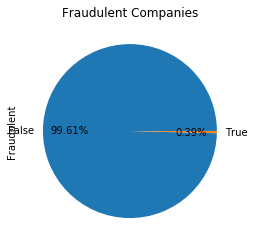

In [12]:
# Graphic of Ratio Fraud vs. non-fraud
df_acc['Fraudulent'].value_counts(['True', 'False']).plot.pie(autopct = '%1.2f%%',
                                                            radius = 1,
                                                            pctdistance = 0.7,
                                                            labeldistance = 1.1,)
plt.title('Fraudulent Companies')

In [13]:
df_acc['acquire_volume'].groupby(df_acc['Fraudulent']).describe()

,count,mean,std,min,25%,50%,75%,max
Fraudulent,,,,,,,,
False,40136.0,4.936127e+06,9.689370e+07,0.0,150.75,49633.5,289991.25,9.067481e+09
True,158.0,7.817142e+06,1.955730e+07,0.0,0.00,568609.0,6873931.75,1.719729e+08


Text(0.5, 1.0, 'Histogram of acquire volume')

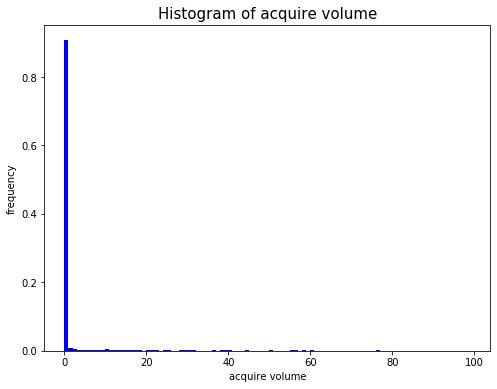

In [14]:
# histogram acquire volume
df_acc['acquire_volume'].plot(kind = 'hist',
              bins = range(0,100),
              density = True,
              color = 'b',
              figsize = (8,6))
plt.xlabel('acquire volume')
plt.ylabel('frequency', fontsize = 10)
plt.title('Histogram of acquire volume', fontsize = 15)

Text(0.5, 1.0, 'Histogram of acquire count transactions')

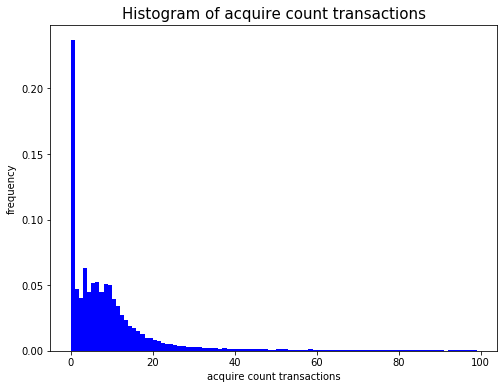

In [15]:
df_acc['acquire_count_transactions'].plot(kind = 'hist',
              bins = range(0,100),
              density = True,
              color = 'b',
              figsize = (8,6))
plt.xlabel('acquire count transactions')
plt.ylabel('frequency', fontsize = 10)
plt.title('Histogram of acquire count transactions', fontsize = 15)

Text(0.5, 1.0, 'Days Account Open')

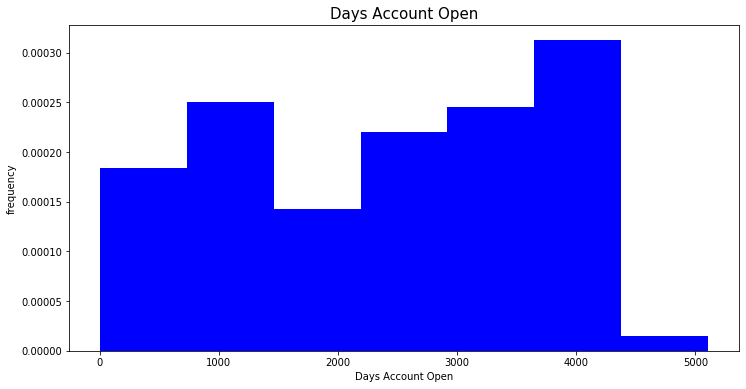

In [16]:
df_acc['DaysAccountOpen'].plot(kind = 'hist',
                            bins = 7,
                            color = 'b',
                            density = True,
                            figsize = (12,6))
plt.xlabel('Days Account Open')
plt.ylabel('frequency', fontsize = 10)
plt.title('Days Account Open', fontsize = 15)

Text(0.5, 1.0, 'Days Account Open')

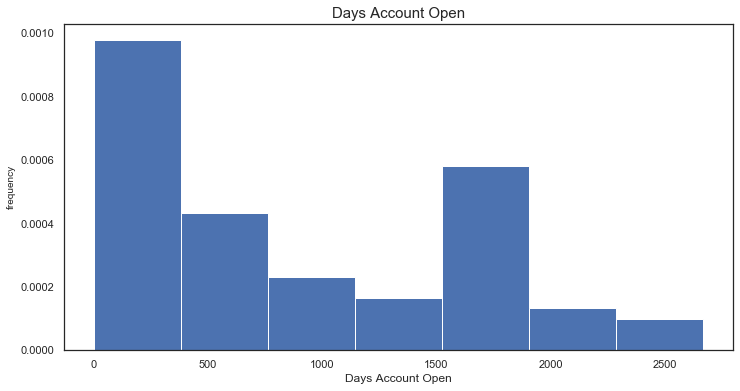

In [203]:
df_fraud['DaysAccountOpen'].plot(kind = 'hist',
                            bins = 7,
                            color = 'b',
                            density = True,
                            figsize = (12,6))
plt.xlabel('Days Account Open')
plt.ylabel('frequency', fontsize = 10)
plt.title('Days Account Open', fontsize = 15)

In [17]:
df_acc['Fraudulent'].value_counts()

False    40136
True       158
Name: Fraudulent, dtype: int64

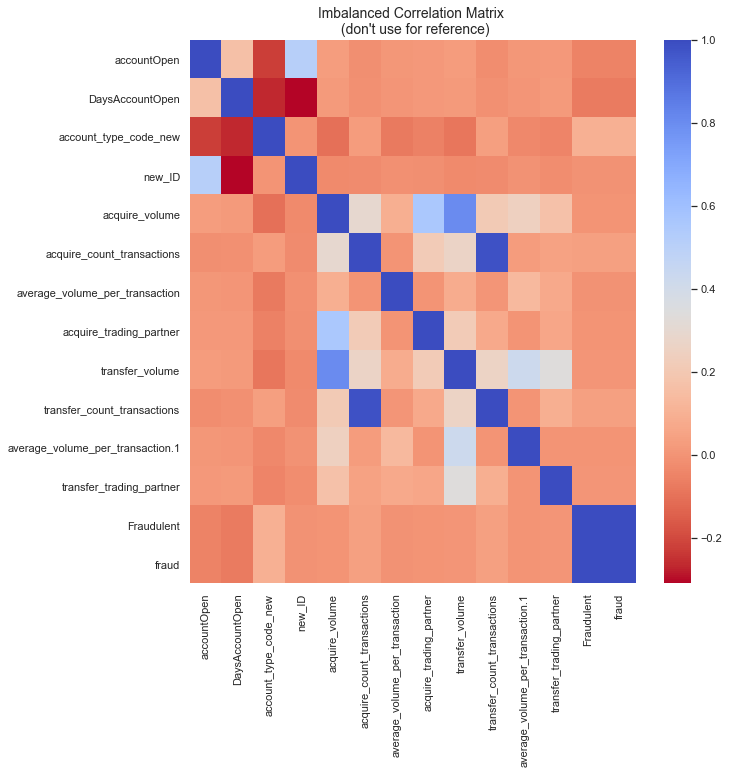

In [208]:
# Make sure we use the subsample in our correlation

f, (ax1) = plt.subplots(1, 1, figsize=(10,10))

# Entire DataFrame
corr = df_acc.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

plt.show()

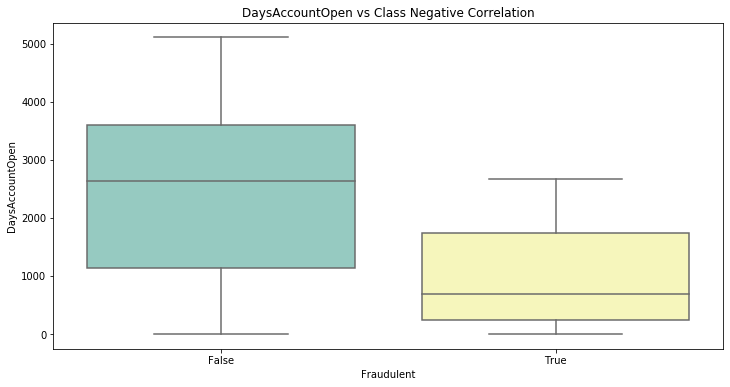

In [19]:
f, ax = plt.subplots(ncols=1, figsize=(12,6))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Fraudulent", y="DaysAccountOpen", data=df_acc, palette="Set3", ax=ax)
ax.set_title('DaysAccountOpen vs Class Negative Correlation')

plt.show()

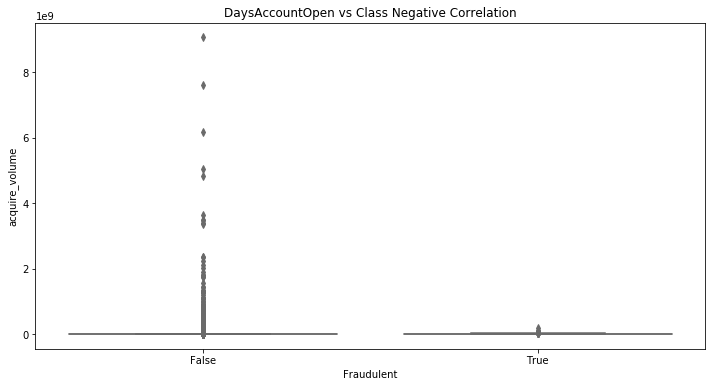

In [20]:
f, ax = plt.subplots(ncols=1, figsize=(12,6))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Fraudulent", y="acquire_volume", data=df_acc, palette="Set3", ax=ax)
ax.set_title('DaysAccountOpen vs Class Negative Correlation')

plt.show()

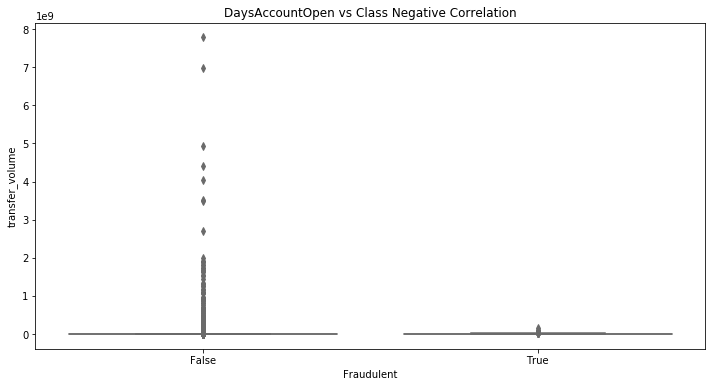

In [21]:
f, ax = plt.subplots(ncols=1, figsize=(12,6))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Fraudulent", y="transfer_volume", data=df_acc, palette="Set3", ax=ax)
ax.set_title('DaysAccountOpen vs Class Negative Correlation')

plt.show()


# Preprocessing: Scaling

Since our data is heavily skewed, we need to normalize it first. 


### Normalization 
Scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.

### Standardization
Scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one

In [22]:
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


import seaborn as sns
sns.set(style="white", color_codes=True)

%matplotlib inline

In [51]:
normalized_X = preprocessing.normalize(df_acc[['acquire_volume']])
normalized_X

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

### Start with standard scaler

Text(0.5, 1.0, 'Histogram of acquired volume')

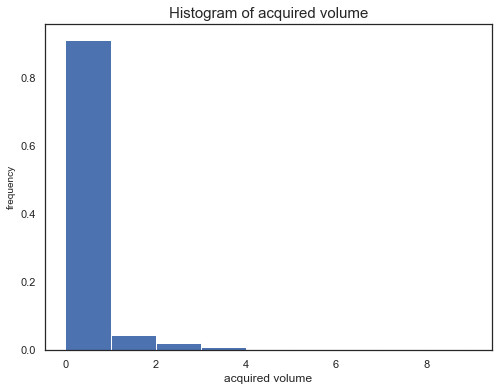

In [70]:
scale = StandardScaler()
df_acc['scaledX'] = scale.fit_transform(df_acc[['acquire_volume']])

df_acc['scaledX'].plot(kind = 'hist',
              bins = range(0,10),
              density = True,
              color = 'b',
              figsize = (8,6))
plt.xlabel('acquired volume')
plt.ylabel('frequency', fontsize = 10)
plt.title('Histogram of acquired volume', fontsize = 15)

In [23]:
# defining X and y
X = df_acc[['acquire_volume']]
col = df_acc['acquire_volume'].values.reshape(-1, 1)


scalers = [
    #('Unscaled data', X),
    ('standard scaling', StandardScaler()),
    ('min-max scaling', MinMaxScaler()),
    ('max-abs scaling', MaxAbsScaler()),
    ('robust scaling', RobustScaler(quantile_range=(25, 75))),
    ('quantile transformation (uniform pdf)', QuantileTransformer(output_distribution='uniform')),
    ('quantile transformation (gaussian pdf)', QuantileTransformer(output_distribution='normal')),
    ('sample-wise L2 normalizing', Normalizer())
]

for scaler in scalers:
    df_acc[scaler[0]] = scaler[1].fit_transform(col)
    
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40294 entries, 0 to 40293
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   accountName                             40294 non-null  object 
 1   accountHolderName                       40294 non-null  object 
 2   registryCode                            40294 non-null  object 
 3   nationalAdminstrator                    40294 non-null  object 
 4   accountType                             40294 non-null  object 
 5   accountTypeCode                         40294 non-null  object 
 6   accountOpen                             40294 non-null  bool   
 7   accountOpeningDate                      40294 non-null  object 
 8   accountClosingDate                      40294 non-null  object 
 9   DaysAccountOpen                         40294 non-null  float64
 10  commitmentPeriod                        40294 non-null  ob

Text(0.5, 1.0, 'Histogram of acquire count transactions')

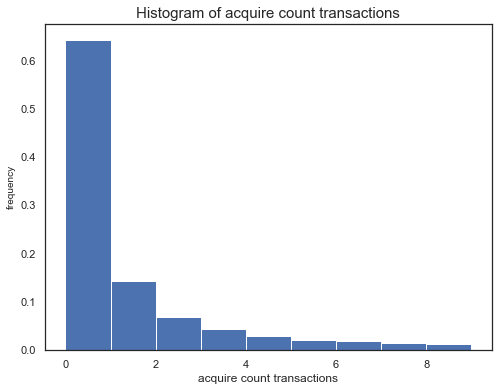

In [31]:
df_acc['robust scaling'].plot(kind = 'hist',
              bins = range(0,10),
              density = True,
              color = 'b',
              figsize = (8,6))
plt.xlabel('acquire count transactions')
plt.ylabel('frequency', fontsize = 10)
plt.title('Histogram of acquire count transactions', fontsize = 15)

Text(0.5, 1.0, 'Histogram of acquire count transactions')

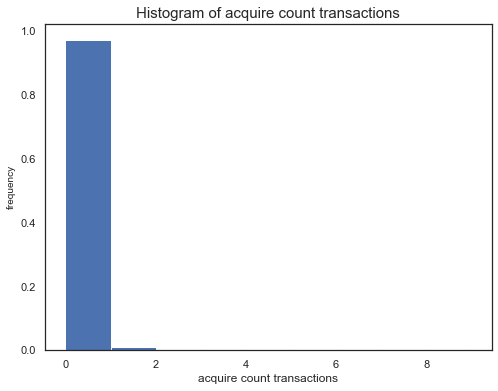

In [32]:
df_acc['acquire_volume'].plot(kind = 'hist',
              bins = range(0,10),
              density = True,
              color = 'b',
              figsize = (8,6))
plt.xlabel('acquire count transactions')
plt.ylabel('frequency', fontsize = 10)
plt.title('Histogram of acquire count transactions', fontsize = 15)

## Split data in training and test set

In [231]:
# Frauds and no Frauds of the cleaned Data
print('No Frauds', round(df_acc['Fraudulent'].value_counts()[False]/len(df_acc) * 100,2), '% of the dataset')
print('Frauds', round(df_acc['Fraudulent'].value_counts()[True]/len(df_acc) * 100,2), '% of the dataset')

print('-' * 100)

# defining X and y
X = df_acc[['DaysAccountOpen', 
            'acquire_volume', 
            'acquire_count_transactions', 
            'transfer_volume',
            'transfer_count_transactions']]
y = df_acc['fraud']




sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
print('-' * 100)

# train and test data
print(original_Xtrain.shape, original_ytrain.shape)
print(original_Xtest.shape, original_ytest.shape)
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.61 % of the dataset
Frauds 0.39 % of the dataset
----------------------------------------------------------------------------------------------------
Train: [    0     1     2 ... 40290 40291 40293] Test: [    6    12    18 ... 40284 40289 40292]
Train: [    0     1     2 ... 40289 40291 40292] Test: [    4    10    11 ... 40285 40290 40293]
Train: [    0     1     2 ... 40291 40292 40293] Test: [    5    13    16 ... 40278 40286 40288]
Train: [    0     1     2 ... 40291 40292 40293] Test: [    3     8    19 ... 40273 40274 40276]
Train: [    3     4     5 ... 40290 40292 40293] Test: [    0     1     2 ... 40280 40287 40291]
----------------------------------------------------------------------------------------------------
(32236, 5) (32236,)
(8058, 5) (8058,)
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99606031 0.00393969]
[0.99615289 0.00384711]


## Example I: Supervised learning

/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarn

/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarn

/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarn

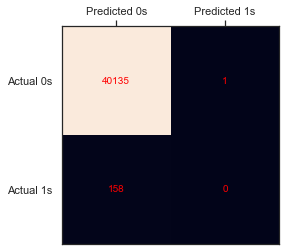

Fraction of correct predictions:  0.9960540030773812


In [209]:
# Logistic Regression on Training Data Set
model = LogisticRegression(solver='newton-cg', C=1, fit_intercept=True,
                           random_state=42, 
                           max_iter=1000) #maybe change solver to newton-cg
model.fit(X, y)
model.predict_proba(X)
pred = model.predict(X)

cm = confusion_matrix(y, model.predict(X))
frac_correct = (cm[0,0]+cm[1,1])/len(df_acc)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print('Fraction of correct predictions: ', frac_correct)



# Find the hyperparameters

In [210]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
grid_log_reg.fit(X_train, y_train)

# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
grid_log_reg.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

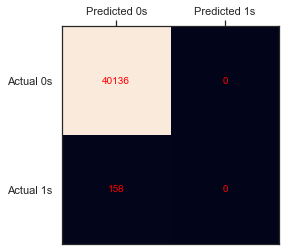

Fraction of correct predictions:  0.9960788206680895


In [211]:
# Logistic Regression on Training Data Set
model = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X, y)
model.predict_proba(X)
pred = model.predict(X)

cm = confusion_matrix(y, model.predict(X))
frac_correct = (cm[0,0]+cm[1,1])/len(df_acc)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print('Fraction of correct predictions: ', frac_correct)



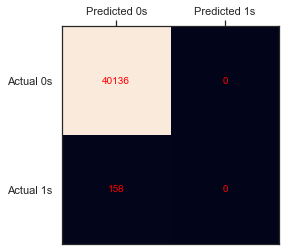

Fraction of correct predictions:  0.9960788206680895


In [212]:
# Random forest
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X, y)
model.predict_proba(X)
pred = model.predict(X)
cm = confusion_matrix(y, model.predict(X))
frac_correct = (cm[0,0]+cm[1,1])/len(df_acc)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print('Fraction of correct predictions: ', frac_correct)



## Unsupervised learning: Isolation forest

In [130]:
# definition of confusion matrix

def plot_confusion_matrix(cm, title, classes=['abnormal', 'normal'],
                          cmap=plt.cm.Blues, save=False, saveas="MyFigure.png"):
    
    # print Confusion matrix with blue gradient colours
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save:
        plt.savefig(saveas, dpi=100)

In [131]:
# definition of Gridsearch

def plot_gridsearch_cv(results, estimator, x_min, x_max, y_min, y_max,save=False, saveas="MyFigure.png"):
    
    # print GridSearch cross-validation for parameters
    
    plt.figure(figsize=(10,8))
    plt.title("GridSearchCV for "+estimator, fontsize=24)

    plt.xlabel(estimator)
    plt.ylabel("Score")
    plt.grid()

    ax = plt.axes()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    pad = 0.005
    X_axis = np.array(results["param_"+estimator].data, dtype=float)

    for scorer, color in zip(sorted(scoring), ['b', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
            ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

        # Annotate the best score for that scorer
        ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score+pad))

    plt.legend(loc="best")
    plt.grid('off')
    plt.tight_layout()
    if save:
        plt.savefig(saveas, dpi=100)
        
    plt.show()

# Supervised ML: Train Isolation Forest and Local Outlier Factor in Supervised Setting


## 1. Data processing



In [143]:
X = df_acc[['DaysAccountOpen', 
            'acquire_volume', 
            'acquire_count_transactions', 
            'transfer_volume',
            'transfer_count_transactions']]
y = df_acc['fraud']

In [160]:
df_acc['fraud'].unique()

array([0, 1])

In [148]:
# normalized

X_normed = preprocessing.normalize(X)

## Split data into training and test set

In [218]:
# training and test data for isolation forest
X_train_sa, X_test_sa, y_train_sa, y_test_sa = train_test_split(X, 
                                                                y, test_size=0.30, random_state=11)


# Turn into an array
X_train_sa = X_train_sa.values
X_test_sa = X_test_sa.values
y_train_sa = y_train_sa.values
y_test_sa = y_test_sa.values


# trainign and test data fror LOFs
X_train_nd, X_test_nd, y_train_nd, y_test_nd = train_test_split(X_normed, y,
                                                    test_size=0.30, random_state=11)


In [193]:
X_train_sa

array([[3.892000e+03, 1.997569e+06, 1.290000e+02, 1.997569e+06,
        1.330000e+02],
       [1.886000e+03, 0.000000e+00, 0.000000e+00, 1.324500e+04,
        2.000000e+00],
       [3.766000e+03, 6.176500e+04, 1.000000e+01, 4.538300e+04,
        1.100000e+01],
       ...,
       [2.921000e+03, 4.371650e+05, 7.000000e+00, 6.745230e+05,
        1.100000e+01],
       [9.800000e+02, 4.400000e+01, 1.000000e+00, 4.400000e+01,
        1.000000e+00],
       [3.541000e+03, 4.059945e+06, 2.500000e+01, 4.059945e+06,
        3.000000e+01]])

In [ ]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

## Training

In [219]:
# define model
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.15, n_estimators=100, n_jobs=-1)
clfLOF = LocalOutlierFactor(n_neighbors=15, metric='euclidean', algorithm='auto', contamination=0.15, n_jobs=-1)

In [232]:
# train model IF
start = datetime.datetime.now()
clfIF.fit(original_Xtrain)
y_pred_train = clfIF.predict(original_Xtrain )
end = datetime.datetime.now()
print (end-start)

0:00:01.960028


In [221]:
# train model LOF
start = datetime.datetime.now()
y_pred_train_lof = clfLOF.fit_predict(X_train_nd, y_train_nd)
end = datetime.datetime.now()
print (end-start)

0:00:00.506430


In [200]:
y_pred_train

array([-1,  1,  1, ...,  1,  1,  1])

## Training results

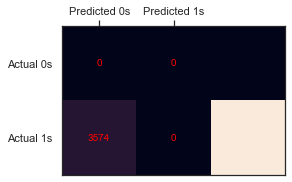

Fraction of correct predictions:  0.0


In [233]:
cm = confusion_matrix(y, model.predict(X))
frac_correct = (cm[0,0]+cm[1,1])/len(df_acc)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print('Fraction of correct predictions: ', frac_correct)

In [236]:
print(classification_report(original_ytrain, y_pred_train, target_names=['anomaly', 'normal', "na"]))
print ("AUC: ", "{:.1%}".format(roc_auc_score(original_ytrain, y_pred_train)))
cm = confusion_matrix(y_train_sa, y_pred_train)
plot_confusion_matrix(cm, title="IF Confusion Matrix - SA", save=True, saveas="IF_SA.png")

              precision    recall  f1-score   support

     anomaly       0.00      0.00      0.00         0
      normal       0.00      0.00      0.00     32109
          na       0.00      0.31      0.00       127

    accuracy                           0.00     32236
   macro avg       0.00      0.10      0.00     32236
weighted avg       0.00      0.00      0.00     32236

AUC:  23.1%


/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [28205, 32236]

/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kotsch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


              precision    recall  f1-score   support

     anomaly       0.00      0.00      0.00         0
      normal       0.00      0.00      0.00     28100
          na       0.00      0.69      0.01       105

    accuracy                           0.00     28205
   macro avg       0.00      0.23      0.00     28205
weighted avg       0.00      0.00      0.00     28205

AUC:  41.8%


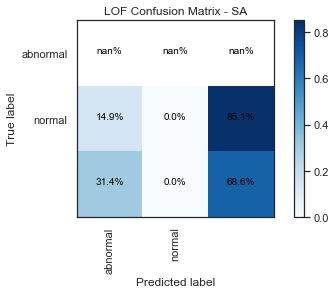

In [190]:
print(classification_report(y_train_nd, y_pred_train_lof, target_names=['anomaly', 'normal', "na"]))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_train_nd, y_pred_train_lof)))
cm = confusion_matrix(y_train_nd, y_pred_train_lof)
plot_confusion_matrix(cm, title="LOF Confusion Matrix - SA")

In [191]:
target = 'target'
sf = datasets.fetch_kddcup99(subset='SF', percent10=False)
dfSF=pd.DataFrame(sf.data, 
                  columns=["duration", "service", "src_bytes", "dst_bytes"])
assert len(dfSF)>0, "SF dataset no loaded."

dfSF[target]=sf.target
anomaly_rateSF = 1.0 - len(dfSF.loc[dfSF[target]==b'normal.'])/len(dfSF)

"SF Anomaly Rate is:"+"{:.1%}".format(anomaly_rateSF)

'SF Anomaly Rate is:0.5%'

In [104]:



# create test and training data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [81]:
ifo = IForest(n_estimators=1000, max_samples=1024, random_state=1,
              contamination=0.01, behaviour='new')
ifo.fit(X_train)
# NB: in contradiction to the documentation, there is no .decision_scores_ attribute for iForest
iforest_scores = ifo.decision_scores_ #ifo.decision_function(x_pen) 

(array([1.6172e+04, 4.2610e+03, 2.1840e+03, 1.6650e+03, 6.7200e+02,
        4.4200e+02, 3.6700e+02, 2.7100e+02, 2.2800e+02, 2.2600e+02,
        1.7900e+02, 1.2600e+02, 1.3300e+02, 1.0100e+02, 9.8000e+01,
        7.7000e+01, 6.3000e+01, 8.1000e+01, 6.6000e+01, 4.3000e+01,
        4.9000e+01, 4.8000e+01, 4.5000e+01, 4.6000e+01, 3.9000e+01,
        4.1000e+01, 4.2000e+01, 3.2000e+01, 2.5000e+01, 4.7000e+01,
        3.7000e+01, 3.0000e+01, 2.4000e+01, 2.8000e+01, 2.8000e+01,
        2.4000e+01, 1.5000e+01, 2.6000e+01, 2.2000e+01, 1.3000e+01,
        1.8000e+01, 1.0000e+01, 1.7000e+01, 8.0000e+00, 1.1000e+01,
        9.0000e+00, 5.0000e+00, 7.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([-0.36016911, -0.34880555, -0.33744199, -0.32607843, -0.31471487,
        -0.30335131, -0.29198775, -0.28062419, -0.26926063, -0.25789707,
        -0.24653352, -0.23516996, -0.2238064 , -0.21244284, -0.20107928,
        -0.18971572, -0.17835216, -0.1669886 , -0.15562504, -0.14426148,
        -0.13289792, -0.12

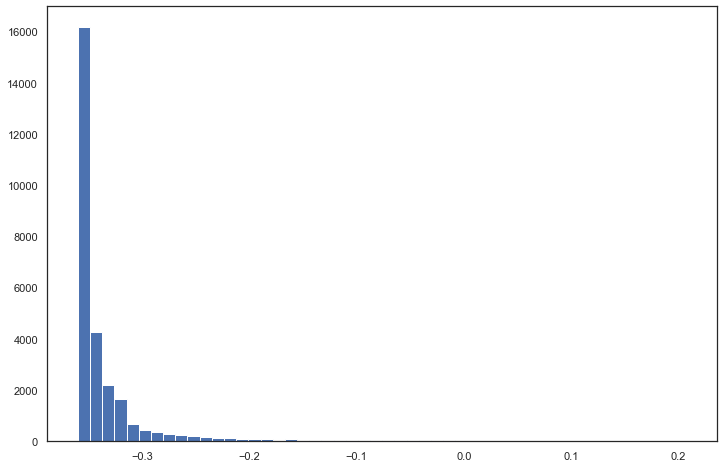

In [82]:
#### Ploting the graph to identify the anomolie score .
plt.figure(figsize=(12, 8))
plt.hist(iforest_scores, bins=50)

In [108]:
rng = np.random.RandomState(42)



fraud = df_acc[df_acc["fraud"]== 1]

X_outliers = fraud[['DaysAccountOpen', 
            'acquire_volume', 
            'acquire_count_transactions', 
            'transfer_volume',
            'transfer_count_transactions']]

# X_outliers = y
# X_outliers = y.values
# X_outliers = y.array.reshape(-1, 1) 


# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

array([ 1,  1, -1, ...,  1,  1,  1])

In [113]:
rng = np.random.RandomState(42)



fraud = df_acc[df_acc["fraud"]== 1]

X_outliers = fraud[['DaysAccountOpen', 
            'acquire_volume', 
            'acquire_count_transactions', 
            'transfer_volume',
            'transfer_count_transactions']]

# X_outliers = y
# X_outliers = y.values
# X_outliers = y.array.reshape(-1, 1) 


# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 2, 50), np.linspace(-5, 2, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 2.

In [90]:
# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [100]:
X_outliers

array([['DE 1903 - BHF - Bank Aktiengesellschaft Personenkonto',
        'BHF - Bank Aktiengesellschaft', 'DE', ..., 2.654416924549659,
        1.0, 1.7270721230170791],
       ['BE Sintex International INC Holding',
        'Sintex International INC', 'BE', ..., 1.036595671888611, 1.0,
        -0.04227499164175835],
       ['PL Instalacja do wypalania ceramiki budowlanej - piec',
        'P.P.U.H. "MARZENA" sp. z o.o.', 'PL', ..., -5.199337582605575,
        0.0, -0.05115719694218756],
       ...,
       ['DE TIMES TRADING GmbH', 'TIMES TRADING GmbH', 'DE', ...,
        -5.199337582605575, 0.0, -0.05115719694218756],
       ['DE World Energy Germany', 'World Energy DE GmbH', 'DE', ...,
        -5.199337582605575, 0.0, -0.05115719694218756],
       ['GB SVS Trading Account', 'SVS Securities PLC', 'GB', ...,
        1.7956002269816422, 1.0, 0.05374379841106473]], dtype=object)

array([[ 4.01800000e+03,  1.17397170e+07,  1.27000000e+03,
         2.00000000e+00,  2.00000000e+00],
       [ 3.12700000e+03,  7.19936092e+08,  3.95200000e+03,
         6.46543679e+08,  7.96300000e+03],
       [ 4.01800000e+03,  8.91666930e+07,  2.55000000e+03,
         2.00000000e+00,  2.00000000e+00],
       ...,
       [-2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        -2.00000000e+00, -2.00000000e+00],
       [-2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        -2.00000000e+00, -2.00000000e+00],
       [-2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        -2.00000000e+00, -2.00000000e+00]])

In [ ]:
# define data and target 
df_acc_data = df_acc[['acquire_volume', 'acquire_count_transactions', 'transfer_volume',
                      'transfer_count_transactions', 'average_volume_per_transaction',
                     'average_volume_per_transaction.1']]

df_acc_target = df_acc[['Fraudulent']]


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_acc_data,
                                                    df_acc_target, test_size=0.3,random_state=109)



In [ ]:
### Split the data set in training and test 

msk = np.random.rand(len(df_acc)) < 0.8
train = df_acc[msk]
test = df_acc[~msk]


In [ ]:
len(test)

In [ ]:
len(train)

In [ ]:
train['Fraudulent'].value_counts()

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(df_acc, test_size=0.2)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
train['Fraudulent'].value_counts()

In [ ]:
### Apply support vector machine model

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(train)

#Predict the response for test dataset
y_pred = clf.predict(test)

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
cancer

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [ ]:
df